## Problem Statement

This project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.

## Import importent libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve

## Upload dataset

In [35]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\practice sheet\Fraud_Analysis_Dataset.csv")

## Analysis of Dataframe

In [36]:
data.shape

(11142, 10)

In [15]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [22]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [23]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [25]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

## Checking for null values

In [26]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

As we see above tables does not contain any null values so it is ready for performing further operation to get our results.

#  Data Preprocessing

## Target distribution

We will categorise the data mainly into two categories, so we can deal further them separately

Numerical
Categorical
Checking for categorical data

In [18]:
data['isFraud'].value_counts(normalize = True)

isFraud
0    0.897505
1    0.102495
Name: proportion, dtype: float64

The dataset is highly imbalance and fraud transaction accounting for only about 10% of the total data which requires special handling during model training.

## Drop Unnecessary Columns

In [19]:
data = data.drop(['nameOrig', 'nameDest'], axis = 1)

I removed nameOrig and nameDest because they are unique identifiers with no predictive value and may cause overfitting

## EDA 

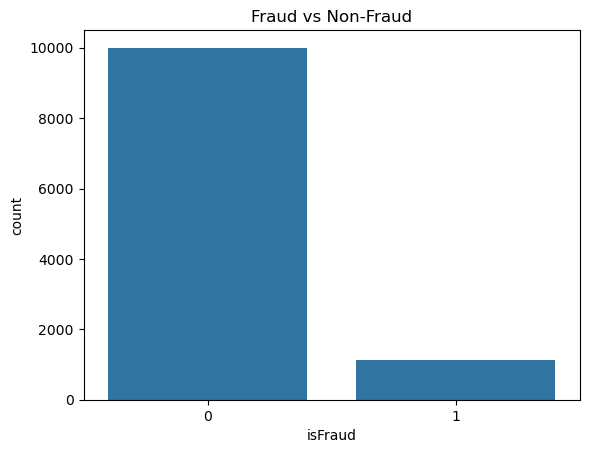

In [29]:
sns.countplot(x = 'isFraud', data = data)
plt.title('Fraud vs Non-Fraud')
plt.show()

This Count plot shows a strong class imbalance in the dataset, where non fraudulent transaction  heavily dominate fraudulent once. because of this imbalace accuracy alone is not a reliable matrics and techniques like class weighting or resampling are required to build an effective fraud detection model.

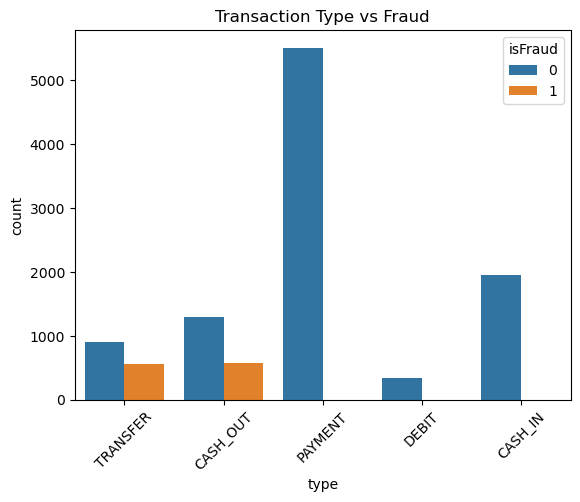

In [30]:
sns.countplot(x = 'type', hue= 'isFraud', data = data)
plt.xticks(rotation = 45)
plt.title ('Transaction Type vs Fraud')
plt.show()

This count plot shows that fraudulent transaction are concentrated in CASH_OUT and TRANSFER transaction types while other types like PAYMENT CASH_IN and DEBIT have almost no fraud. This indicates that transaction type is a critical feature for fraud detection and also highlights class imbalance in the dataset.  

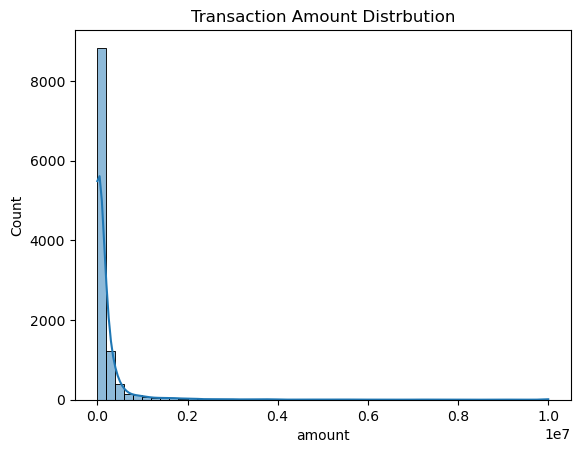

In [31]:
sns.histplot(data['amount'], bins = 50, kde =True)
plt.title('Transaction Amount Distribution')
plt.show()

This histogram helps understand the distribution of transaction amount, showing a right skewed pattern where high value transaction are rare but critical for fraud detection.

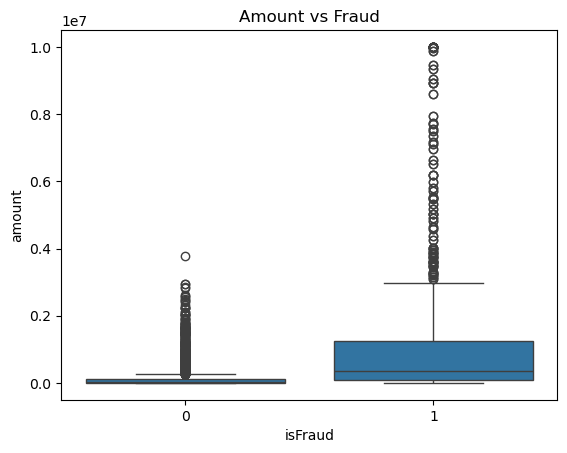

In [32]:
sns.boxplot(x = 'isFraud', y = 'amount', data = data)
plt.title('Amount vs Fraud')
plt.show()

This box plot shows that fraudulent transaction tend to have higher transaction amounts and more extreme outliers compared to non fraud transactions which markes amount an important feature for fraud detection 

I performed EDA to understand transaction behavior identify fraud patterns and analyze feature relationship. Class imbalance and transaction type played a sgnificant role in fraud detection.

## Encoding Categorical Columns

In [20]:
data = pd.get_dummies(data, columns = ['type'], drop_first = True)

Since we are doing feature engineering so we are changing the catogorical value to numerical value because system will not read catogorical value so we will just change all five categories for our FEATURE ENGINEERING PROSPECT!

So we used pd.get_dummies()

## Feature and Target Split

In [21]:
x = data.drop('isFraud', axis = 1)
y = data['isFraud']

I separated the independent variables and the target variable to prepare the dataset for model training.

## Train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

I split data nto training and testing setsto evaluate the model on unseen data.

## Feature Scaling Logistic Regression 

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

I applied feature scaling using StandardScaler to ensure all feature contribute equally and avoided data leakage by fitting only on training data.  

# Model Building

## Logistic Regression

In [22]:
model = LogisticRegression(max_iter = 1000, class_weight = 'balanced')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

I used Logistic Regression as a baseline model with class weighting to hndel dta imbalance. 

## Random Forest

In [23]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

Random Forest was used to capture non linear relation and improve fraud detectiion performance.

## Gradient Boosting

In [23]:
model_gb = GradientBoostingClassifier(random_state = 42)
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

Gradient Boosting improves fraud detection by focusing on previouslymisclassified transactions

## Model Evaluation

## Logistiic Regression

In [40]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test,model.predict_proba(x_test)[:,1])

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1999
           1       0.82      0.93      0.87       230

    accuracy                           0.97      2229
   macro avg       0.91      0.95      0.93      2229
weighted avg       0.97      0.97      0.97      2229



np.float64(0.9940317985079496)

## Random Forest

In [41]:
print(classification_report(y_test, y_pred_rf))
roc_auc_score(y_test, model_rf.predict_proba(x_test)[:,1])

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.95      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



np.float64(0.9976444744111187)

## Gradient Boosting

In [42]:
print(classification_report(y_test, y_pred_gb))
roc_auc_score(y_test, model_gb.predict_proba(x_test)[:,1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      0.96      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



np.float64(0.9997911999478001)

I evaluated my fraud detection models using precision, recall, F1 score and ROC-AUC. since the dataset imbalance recall and F1 score for the fraud class were prioritized. the Grdient Boosting model achived around 98-99% recall for fraudand a ROC-AUCclose to 0.99 making it the best performing model.

## Confusion Matrix

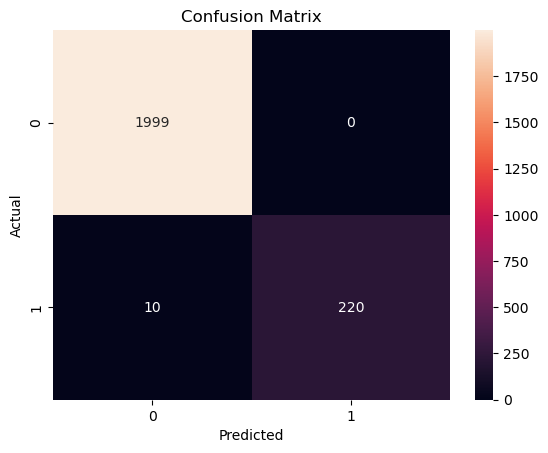

In [43]:
Confusion_matrix = confusion_matrix (y_test, y_pred_gb)

sns.heatmap(Confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that while the model performs well on non fraud transaction it struggles to correctly identify fraud cases. The high number of false negatives indicates the need for class balancing techniques or threshold tuning to improve fraud recall.

## ROC Curve

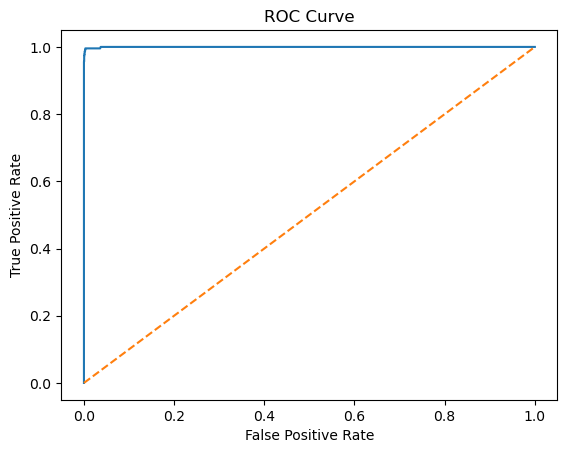

In [44]:
y_prob = model_gb.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve shows the trade off between true positive rate and false positive rate. since the curve is close to the top leftcorner the model has strong discrimivatory power in distinguishing fraudulent from non fraudulent transacton.

## Feature Importance

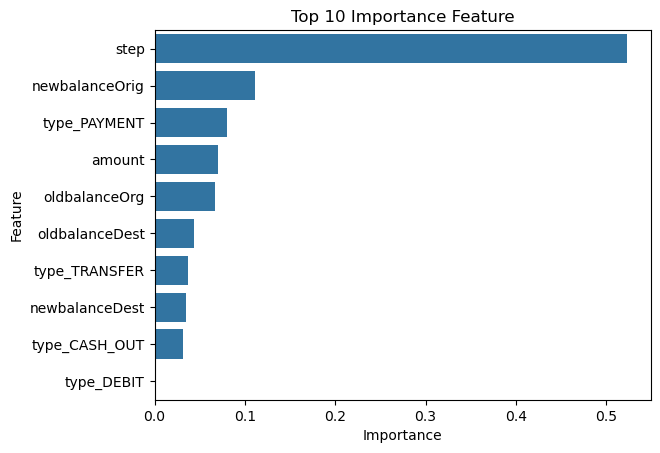

In [45]:
imp = pd.DataFrame({
    'Feature' : x.columns,
    'Importance' : model_rf.feature_importances_
}).sort_values( by = 'Importance', ascending = False). head(10)

sns.barplot(x = 'Importance', y = 'Feature', data = imp)
plt.title('Top 10 Importance Feature')
plt.show()

Feature importance helps identify which transaction attributes most influence fraud predictions with time step and balance related featurebeing the most significant

## Business Impact Analysis

In [48]:
print(type(x_test))
print(type(y_test))
print(type(y_pred_gb))
print(len(x_test), len(y_test), len(y_pred_gb))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
2229 2229 2229


In [31]:
amount_np = np.asarray(x_test['amount'])
y_test_np = np.asarray(y_test)
y_pred_np = np.asarray(y_pred_gb)

mask = (y_test_np == 1) & (y_pred_np == 1)
print(mask.sum())

saved_money = amount_np[mask].sum()
saved_money

220


np.float64(242939904.64999998)

## Final Conclusion

The gradient Boosting model demonstrated strong performance in detecting fraudulent mobile transactions. By focusing on recall and business impact instead of accuracy, the project delivers real world value for financial institutions, i translated machine learning predictions into real financial value by estimating the fraud amount correctly detected by the model.